Confusion Matrix (0.5):
[[71  1]
 [ 2 40]]
Precision: 0.976
Recall:    0.952
ROC-AUC:   0.996

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        72
   Malignant       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Unnamed: 32']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


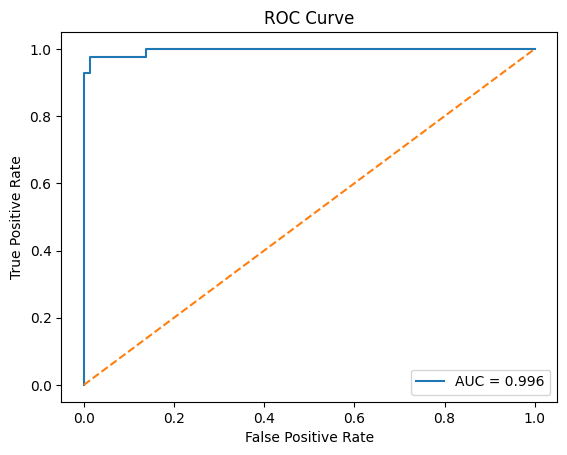

Threshold Tuning Results:

Threshold = 0.2
 Precision: 0.911, Recall: 0.976
 Confusion Matrix:
[[68  4]
 [ 1 41]]

Threshold = 0.5
 Precision: 0.976, Recall: 0.952
 Confusion Matrix:
[[71  1]
 [ 2 40]]

Threshold = 0.8
 Precision: 1.000, Recall: 0.857
 Confusion Matrix:
[[72  0]
 [ 6 36]]


In [2]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
    classification_report
)

df = pd.read_csv('/content/data.csv')

if 'diagnosis' in df.columns:
    df = df.dropna(subset=['diagnosis'])

if 'id' in df.columns:
    df = df.drop(columns=['id'])


df['target'] = df['diagnosis'].map({'M': 1, 'B': 0})

X = df.drop(columns=['diagnosis', 'target'])
y = df['target']


X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)


tscaler = StandardScaler()
X_train_scaled = tscaler.fit_transform(X_train_imp)
X_test_scaled = tscaler.transform(X_test_imp)


model = LogisticRegression(solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)


y_prob = model.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_prob >= 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("Confusion Matrix (0.5):")
print(cm)
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

thresholds = [0.2, 0.5, 0.8]
print("Threshold Tuning Results:")
for thr in thresholds:
    preds = (y_prob >= thr).astype(int)
    p = precision_score(y_test, preds)
    r = recall_score(y_test, preds)
    cm_thr = confusion_matrix(y_test, preds)
    print(f"\nThreshold = {thr}")
    print(f" Precision: {p:.3f}, Recall: {r:.3f}")
    print(" Confusion Matrix:")
    print(cm_thr)
